In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic2"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import(
    run_binary_regression, 
    transport_modes_dict, 
    trip_motives, 
    province_codes, 
    transport_mode_col, 
    plot_willingness_by_buurt_heatmap,
    binary_pipeline_as_willingness_function
    )
from codebase.data_loading.load_odin import load_odin
%load_ext autoreload
%autoreload 2

Changed to c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation


This ensures that each ODiN dataset is loaded as a csv file for faster processing. If a ODiN file only exit as an excel file, an csv version is created (this takes about 20 minutes).

In [2]:
df_all = load_odin()

[INFO] Loading ODiN data for years: [2019, 2020, 2021, 2022, 2023]
[INFO] Reading file: data\OdiN 2019-2023\OdiN 2019\ODiN2019_Databestand_v2.0.csv
Loaded file from CSV
[INFO] Loaded 179,091 rows for 2019
[INFO] Reading file: data\OdiN 2019-2023\OdiN 2020\ODiN2020_Databestand_v2.0.csv
Loaded file from CSV
[INFO] Loaded 176,729 rows for 2020
[INFO] Reading file: data\OdiN 2019-2023\OdiN 2021\ODiN2021_Databestand.csv
Loaded file from CSV
[INFO] Loaded 196,768 rows for 2021
[INFO] Reading file: data\OdiN 2019-2023\OdiN 2022\ODiN2022_Databestand.csv
Loaded file from CSV
[INFO] Loaded 200,054 rows for 2022
[INFO] Reading file: data\OdiN 2019-2023\OdiN 2023\ODiN2023_Databestand.csv
Loaded file from CSV
[INFO] Loaded 211,991 rows for 2023
[INFO] Total rows after concatenation: 964,633
[FILTER] Only-one-mode trips: 820,488 rows (filtered 144,145)
[FILTER] After ignore rules: 820,488 rows (filtered 0)
[DONE] Final dataset shape: (820488, 251)


Common labels: [0 1]


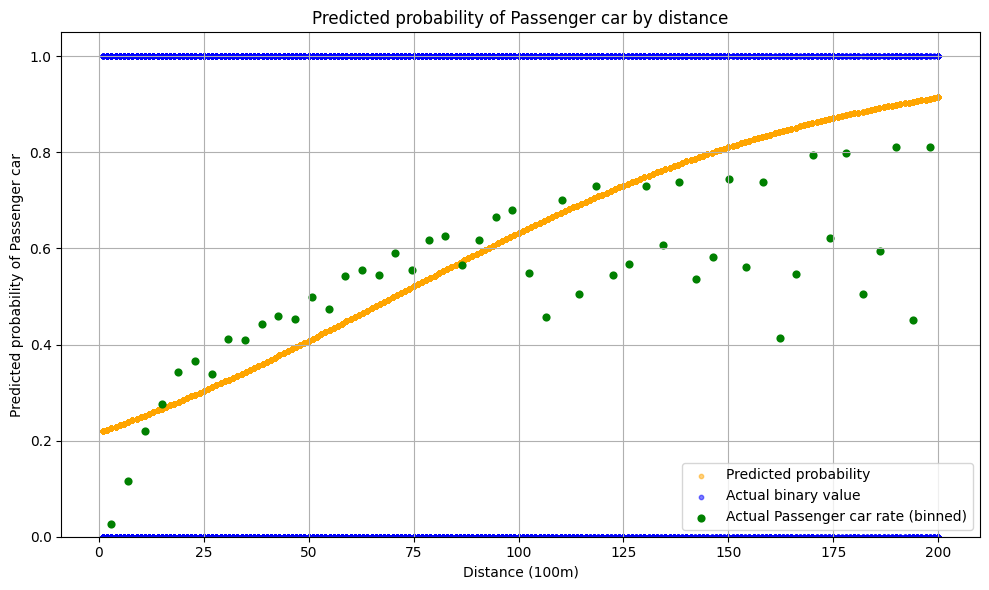

<Figure size 1000x1000 with 0 Axes>

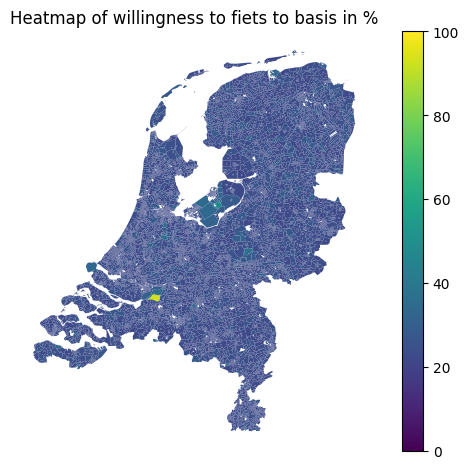

Common labels: [0 1]


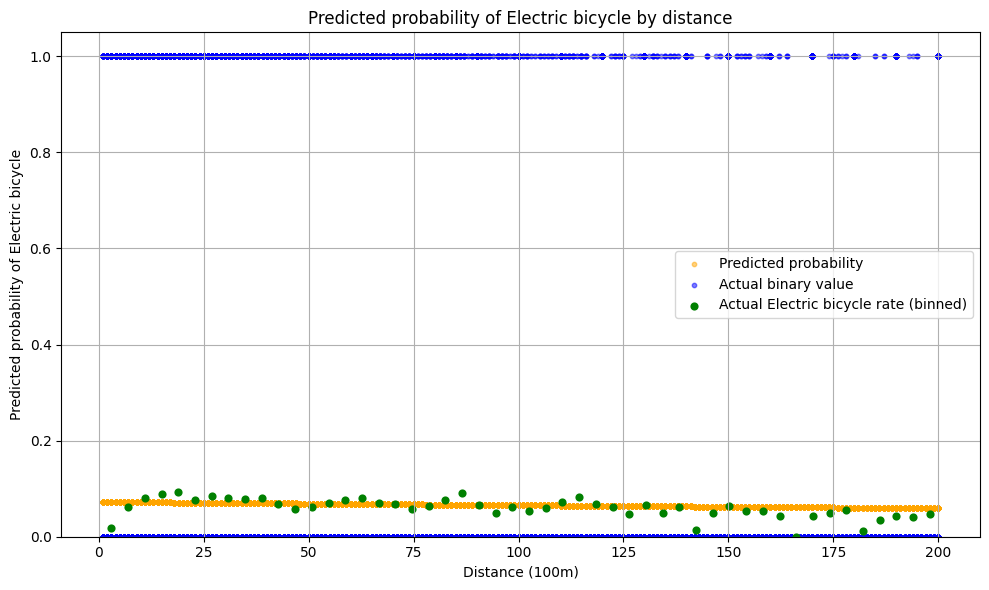

<Figure size 1000x1000 with 0 Axes>

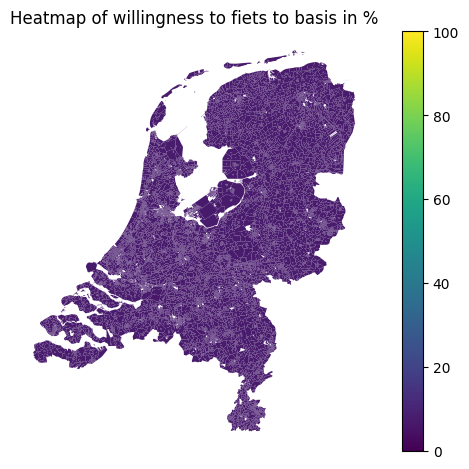

Common labels: [0 1]


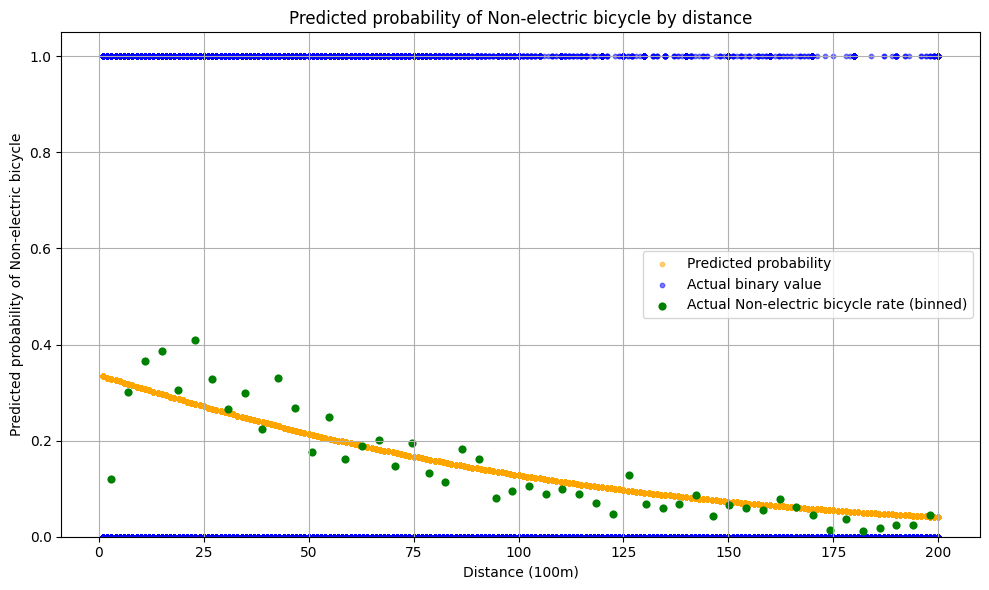

<Figure size 1000x1000 with 0 Axes>

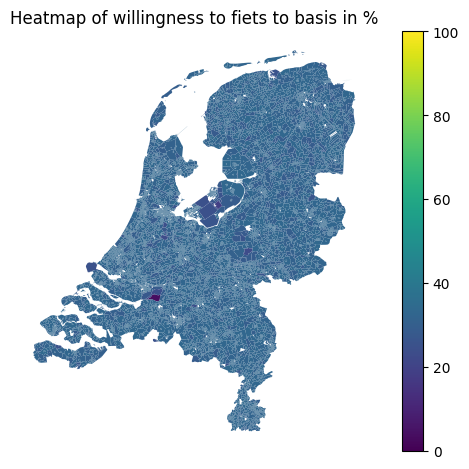

Common labels: [0 1]


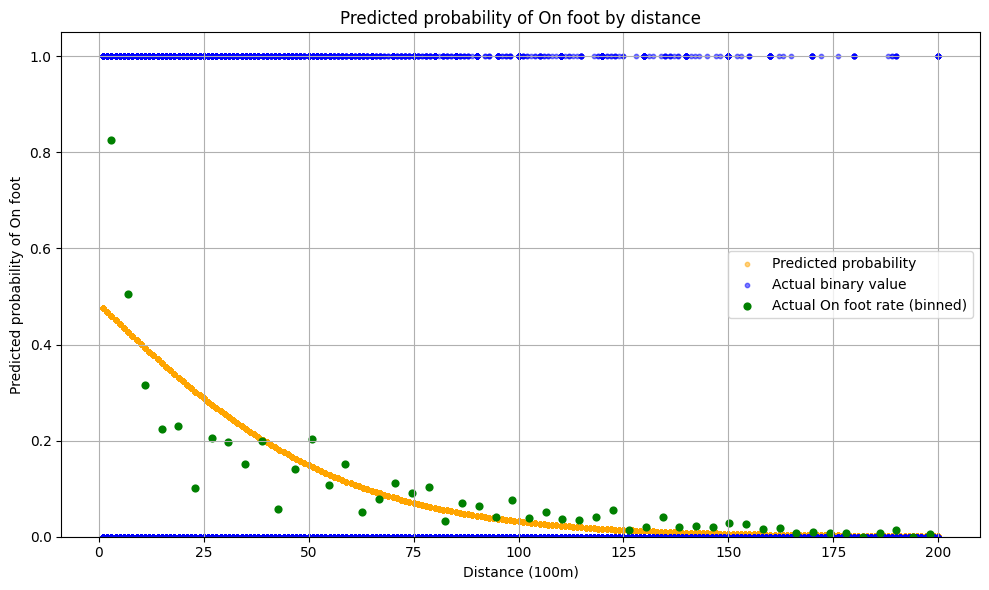

<Figure size 1000x1000 with 0 Axes>

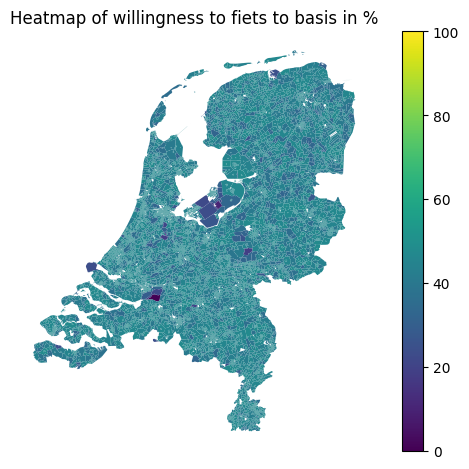

In [4]:
max_dist=200 # max distance in 100s of meters
motives=None
vehicles_to_include = [1, 7, 8, 9, ]
for transport_mode in vehicles_to_include:
    pipeline_in_loop, _ = run_binary_regression(
        df_all,
        test_size=0.2,
        transport_modes_predict=[transport_mode, ],
        max_dist=max_dist,
        savename=f"graphics/classification_results/binary_regression/{motives}/{transport_modes_dict[transport_mode].replace(r'/', ' or ')}_{max_dist}",
    )

    plot_willingness_by_buurt_heatmap(
        punt2="basis",
        mode="fiets",
        location=None,
        savename=f"graphics/nl_maps/binary_{transport_modes_dict[transport_mode].replace(r'/', ' or ')}_willingness.png",
        willingness_function=binary_pipeline_as_willingness_function,
        multiply_by_population=False,
        pipeline=pipeline_in_loop,
        title_vehicle=transport_modes_dict[transport_mode].replace(r'/', ' or '),
    )

In [ ]:
transport_modes_dict

{1: 'Passenger car',
 2: 'Train',
 3: 'Bus',
 4: 'Tram',
 5: 'Metro',
 6: 'Speed pedelec',
 7: 'Electric bicycle',
 8: 'Non-electric bicycle',
 9: 'On foot',
 10: 'Touring car',
 11: 'Delivery van',
 12: 'Truck',
 13: 'Camper',
 14: 'Taxi/Minibus',
 15: 'Agricultural vehicle',
 16: 'Motorcycle',
 17: 'Moped',
 18: 'Light moped',
 19: 'Mobility aid with motor',
 20: 'Mobility aid without motor',
 21: 'Skates/inline skates/kick scooter',
 22: 'Boat',
 23: 'Other with motor',
 24: 'Other without motor'}

Common labels: [0 1]


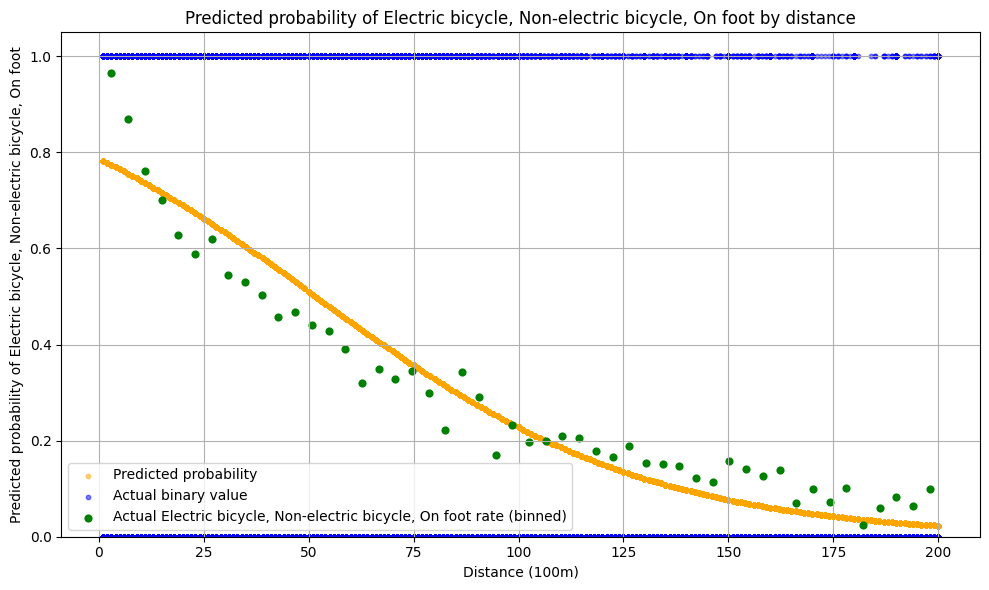

<Figure size 1000x1000 with 0 Axes>

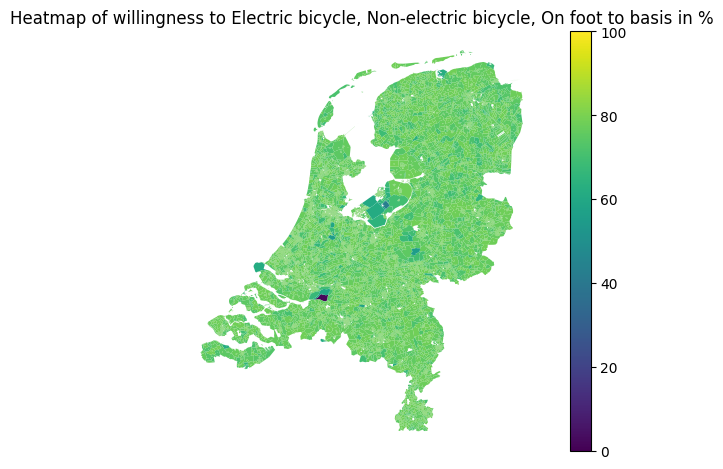

In [5]:
combined_modes = [[7,8,9]]
for tm in combined_modes:
    transport_mode_str = ", ".join([transport_modes_dict[tm_] for tm_ in tm])
    pipeline_combined, _ = run_binary_regression(
        df_all,
        test_size=0.2,
        transport_modes_predict=tm,
        motives=motives,
        max_dist=max_dist,
        savename=f"graphics/classification_results/binary_regression/{motives}/{transport_mode_str.replace(r'/', ' or ')}_{max_dist}",
    )

    plot_willingness_by_buurt_heatmap(
    punt2="basis",
    mode="fiets",
    location=None,
    savename=f"graphics/nl_maps/binary{transport_mode_str}_willingness.png",
    transport_mode_str = transport_mode_str,
    willingness_function=binary_pipeline_as_willingness_function,
    multiply_by_population=False,
    pipeline=pipeline_combined,
)

<Figure size 1000x1000 with 0 Axes>

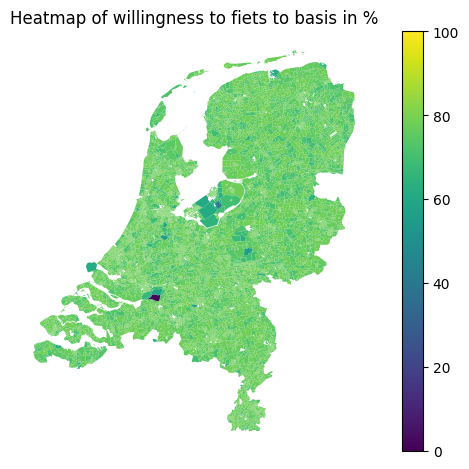

In [6]:
from codebase import plot_willingness_by_buurt_heatmap
plot_willingness_by_buurt_heatmap(
    punt2="basis",
    mode="fiets",
    location=None,
    savename="graphics/nl_maps/binary_combined_willingness.png",
    willingness_function=binary_pipeline_as_willingness_function,
    multiply_by_population=False,
    pipeline=pipeline_combined,
)